# Trabalho 4

Professor: Grazione Souza

- Nome do aluno: Pedro Henrique Couto Silva;
- Matrícula: $202020466311$

- Nome do aluno : Vinicius Carvalho Monnerat Bandeira;
- Matrícula: $202020466711$

O estudo aqui proposto pode ser encontrado em https://github.com/ViniciusCMB/Metodos_Num.git


## Bibliotecas

In [147]:
import numpy as np
import matplotlib.pyplot as plt

## Função para resolver o problema

In [148]:
def func_C(Lx, Nx, T, Nt, alpha, u, CE):
    dx = Lx / Nx
    dt = T / Nt

    # Verificar a restrição do passo de tempo
    if dt > 1 / (((2 * alpha) / (dx**2)) + (u / dx)):
        raise ValueError(
            "O passo de tempo não satisfaz a condição de estabilidade.")

    # Inicializar a matriz de concentração
    C = np.zeros((Nt, Nx))

    # Condição inicial
    C[0, :] = 0.0

    # Condição de contorno
    C[:, 0] = CE

    # Loop de tempo
    for n in range(0, Nt-1):
        for i in range(1, Nx-1):
            C[n+1, i] = (C[n, i] + dt * (-u * (C[n, i] - C[n, i-1]) / dx +
                                        alpha * (C[n, i+1] - 2 * C[n, i] + C[n, i-1]) / dx**2))
        # Condição de contorno Neumann no final do domínio
        C[n+1, -1] = C[n+1, -2]

    x = np.linspace(0, Lx, Nx)

    return C, x

A função `func_C` é responsável por resolver a equação de advecção-difusão unidimensional utilizando o método das diferenças finitas explícitas.

### Definição da Função

```python
def func_C(Lx, Nx, T, Nt, alpha, u, CE):
```

- `Lx`: Comprimento do domínio espacial.
- `Nx`: Número de pontos no espaço.
- `T`: Tempo total de simulação.
- `Nt`: Número de pontos no tempo.
- `alpha`: Coeficiente de difusão.
- `u`: Velocidade de advecção.
- `CE`: Condição de contorno no início do domínio (x=0).

### Cálculo dos Passos no Espaço e no Tempo

```python
dx = Lx / Nx
dt = T / Nt
```

- `dx`: Passo no espaço.
- `dt`: Passo no tempo.

### Verificação da Condição de Estabilidade

```python
if dt > 1 / (((2 * alpha) / (dx**2)) + (u / dx)):
    raise ValueError("O passo de tempo não satisfaz a condição de estabilidade.")
```

- Verifica se o passo de tempo `dt` satisfaz a condição de estabilidade para garantir a precisão e estabilidade da solução numérica.

### Inicialização da Matriz de Concentração

```python
C = np.zeros((Nt, Nx))
```

- `C`: Matriz de concentração inicializada com zeros, onde cada linha representa um instante de tempo e cada coluna representa um ponto no espaço.

### Condição Inicial

```python
C[0, :] = 0.0
```

- Define a condição inicial de concentração como zero em todo o domínio espacial.

### Condição de Contorno

```python
C[:, 0] = CE
```

- Define a condição de contorno no início do domínio (x=0) como `CE`.

### Loop de Tempo

```python
for n in range(0, Nt-1):
    for i in range(1, Nx-1):
        C[n+1, i] = (C[n, i] + dt * (-u * (C[n, i] - C[n, i-1]) / dx +
                                    alpha * (C[n, i+1] - 2 * C[n, i] + C[n, i-1]) / dx**2))
    # Condição de contorno Neumann no final do domínio
    C[n+1, -1] = C[n+1, -2]
```

- O loop externo percorre cada instante de tempo.
- O loop interno percorre cada ponto no espaço, exceto os pontos de contorno.
- A equação de diferenças finitas é utilizada para atualizar a concentração `C` no próximo instante de tempo.
- A condição de contorno de Neumann é aplicada no final do domínio (x=Lx), assumindo que a derivada da concentração em relação ao espaço é zero.

### Geração do Vetor de Espaço

```python
x = np.linspace(0, Lx, Nx)
```

- `x`: Vetor de pontos no espaço, uniformemente distribuídos entre 0 e `Lx`.

### Retorno dos Resultados

```python
return C, x
```

- A função retorna a matriz de concentração `C` e o vetor de pontos no espaço `x`.

## Parâmetros para a solução

In [149]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 1.0   # tempo total de simulação
alpha = 0.01
u = 1.0
CE = 5.0

# Parâmetros de discretização
Nx = 100  # número de pontos no espaço
Nt = 1000  # número de pontos no tempo

## Obtém a solução e o domnínio

In [150]:
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)

C[-1, :]

array([5.00000000e+00, 4.99999997e+00, 4.99999988e+00, 4.99999970e+00,
       4.99999934e+00, 4.99999864e+00, 4.99999733e+00, 4.99999497e+00,
       4.99999081e+00, 4.99998366e+00, 4.99997160e+00, 4.99995165e+00,
       4.99991924e+00, 4.99986743e+00, 4.99978597e+00, 4.99965981e+00,
       4.99946733e+00, 4.99917785e+00, 4.99874860e+00, 4.99812077e+00,
       4.99721479e+00, 4.99592461e+00, 4.99411110e+00, 4.99159451e+00,
       4.98814625e+00, 4.98348022e+00, 4.97724407e+00, 4.96901104e+00,
       4.95827293e+00, 4.94443511e+00, 4.92681443e+00, 4.90464098e+00,
       4.87706456e+00, 4.84316667e+00, 4.80197853e+00, 4.75250544e+00,
       4.69375719e+00, 4.62478403e+00, 4.54471697e+00, 4.45281087e+00,
       4.34848811e+00, 4.23138060e+00, 4.10136740e+00, 3.95860541e+00,
       3.80355064e+00, 3.63696805e+00, 3.45992862e+00, 3.27379277e+00,
       3.08018044e+00, 2.88092878e+00, 2.67803925e+00, 2.47361686e+00,
       2.26980440e+00, 2.06871532e+00, 1.87236868e+00, 1.68262933e+00,
      

## Plota a solução

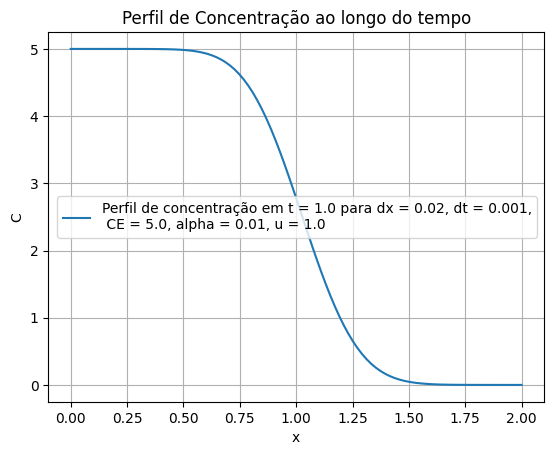

In [151]:
# Plotando o resultado
plt.plot(x, C[-1, :], label=f'Perfil de concentração em t = {T} para dx = {Lx / (Nx)}, dt = {T / Nt},\n CE = {CE}, alpha = {alpha}, u = {u}')
plt.xlabel('x')
plt.ylabel('C')
plt.grid()
titulo = 'Perfil de Concentração ao longo do tempo'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')

-------------

## Estudando valores para $Nx = \{50, 100, 150, 200\}$ com $Lx = 1, Nt = 1000, alpha = 0.01, u = 0.1, dt = 0.01,$ e tempo de simulação $T = 1.0$ 

Ao aumentar o número de pontos no espaço (Nx), a discretização do domínio espacial se torna mais refinada. Isso significa que a resolução espacial da simulação melhora, permitindo capturar mais detalhes da variação da concentração ao longo do domínio. 

- **Maior precisão**: Com um Nx maior, a solução numérica tende a ser mais precisa, pois a aproximação das derivadas espaciais melhora.
- **Maior custo computacional**: Um Nx maior também implica em um maior número de cálculos, aumentando o tempo de execução da simulação.
- **Estabilidade**: É importante garantir que o passo de tempo (dt) satisfaça a condição de estabilidade para evitar resultados numéricos incorretos.

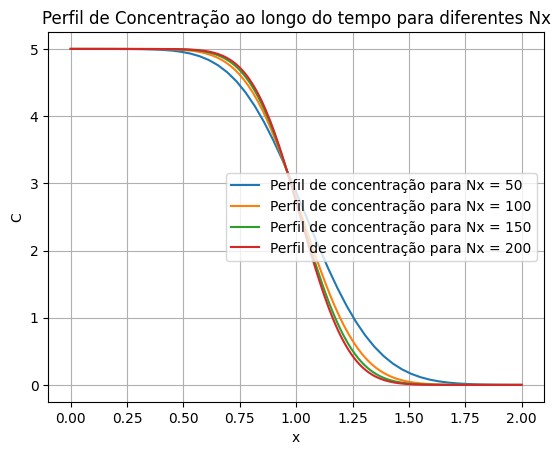

In [152]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 1.0   # tempo total de simulação
alpha = 0.01
u = 1.0
CE = 5.0

# Parâmetros de discretização
Nx = 50  # número de pontos no espaço
Nt = 1000  # número de pontos no tempo

C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nx = {Nx}')

# Parâmetros de discretização
Nx = 100  # número de pontos no espaço
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nx = {Nx}')

# Parâmetros de discretização
Nx = 150  # número de pontos no espaço
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nx = {Nx}')

# Parâmetros de discretização
Nx = 200  # número de pontos no espaço
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nx = {Nx}')

# Plotando o resultado
plt.xlabel('x')
plt.ylabel('C')
plt.grid()
titulo = 'Perfil de Concentração ao longo do tempo para diferentes Nx'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')

Os resultados mostraram que, com o aumento de Nx, os perfis de concentração se tornam mais suaves e detalhados.

--------------

## Estudando valores para $Nt = \{300, 400, 500, 1000\}$ com $Lx = 1, Nx = 200, alpha = 0.01, u = 0.1, dt = 0.01,$ e tempo de simulação $T = 1.0$ 

Ao aumentar o número de pontos no tempo (Nt), a discretização do domínio temporal se torna mais refinada. Isso significa que a resolução temporal da simulação melhora, permitindo capturar mais detalhes da variação da concentração ao longo do tempo.

- **Maior precisão temporal**: Com um Nt maior, a solução numérica tende a ser mais precisa, pois a aproximação das derivadas temporais melhora.
- **Maior custo computacional**: Um Nt maior também implica em um maior número de cálculos, aumentando o tempo de execução da simulação.
- **Estabilidade**: É importante garantir que o passo de tempo (dt) satisfaça a condição de estabilidade para evitar resultados numéricos incorretos.

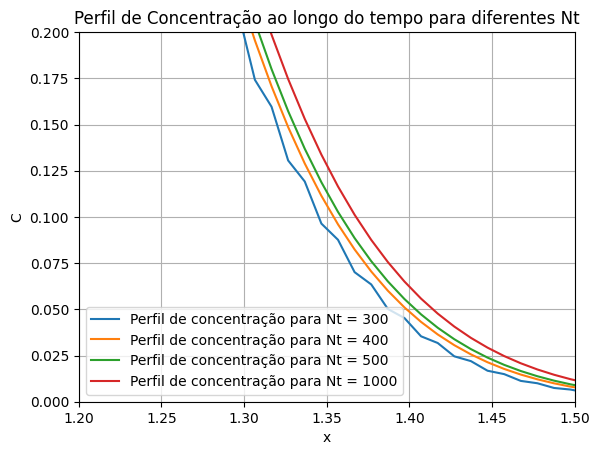

In [153]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 1.0   # tempo total de simulação
alpha = 0.01
u = 1.0
CE = 5.0

# Parâmetros de discretização
Nx = 200  # número de pontos no espaço
Nt = 300  # número de pontos no tempo

C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nt = {Nt}')

# Parâmetros de discretização
Nt = 400 # número de pontos no tempo
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nt = {Nt}')

# Parâmetros de discretização
Nt = 500  # número de pontos no tempo
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nt = {Nt}')

# Parâmetros de discretização
Nt = 1000  # número de pontos no tempo
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil de concentração para Nt = {Nt}')

# Plotando o resultado
plt.xlabel('x')
plt.ylabel('C')
plt.grid()
titulo = 'Perfil de Concentração ao longo do tempo para diferentes Nt'
plt.title(titulo)
plt.axis([1.2, 1.5, 0, 0.2])
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')

Como é possível observar, maiores valores de Nt aumentam a suavidade das curvas.

----------------

## Estudando valores para $\alpha = \{0.1, 0.05, 0.01, 0.001\}$ com $Lx = 1, Nx = 100, Nt = 1000, u = 0.1, dt = 0.01,$ e tempo de simulação $T = 1.0$ 

Ao diminuir os valores de $\alpha$, que é o coeficiente de difusão, observamos os seguintes efeitos na simulação:

- **Menor Difusão**: Valores menores de $\alpha$ resultam em menor difusão da concentração ao longo do domínio. Isso significa que a concentração tende a se espalhar menos, resultando em perfis de concentração mais acentuados e menos suaves.
- **Perfis Mais Acentuados**: Com $\alpha$ menor, a concentração tende a permanecer mais próxima da condição de contorno inicial, criando um gradiente mais acentuado.
- **Menor Suavidade**: Perfis de concentração com $\alpha$ menor são menos suaves e apresentam variações mais abruptas.

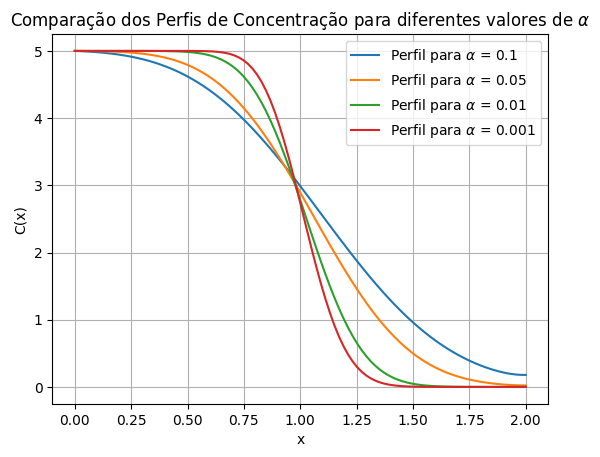

In [154]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 1.0   # tempo total de simulação
alpha = 0.1
u = 1.0
CE = 5.0

# Parâmetros de discretização
Nx = 100  # número de pontos no espaço
Nt = 1000  # número de pontos no tempo

# Resultado
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil para $\\alpha$ = {alpha}')

alpha = 0.05  # constante alpha
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil para $\\alpha$ = {alpha}')

alpha = 0.01  # constante alpha
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil para $\\alpha$ = {alpha}')

alpha = 0.001  # constante alpha
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil para $\\alpha$ = {alpha}')


plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de $\\alpha$'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')

Como observado, valores menores de $\alpha$ tornam a curva com variaçãoes mais abruptas.

----------------

## Estudando valores para $u = \{1.0, 0.5, 0.1, 0.01\}$ com $Lx = 1, Nx = 100, Nt = 1000, \alpha = 0.01, dt = 0.01,$ e tempo de simulação $T = 1.0$ 

A velocidade de advecção ($u$) é um parâmetro crucial na equação de advecção-difusão, pois determina a taxa de transporte da concentração ao longo do domínio. Abaixo estão alguns pontos importantes sobre como diferentes valores de $u$ afetam a solução:

- **Maior $u$**:
    - A concentração é transportada mais rapidamente ao longo do domínio.
    - O perfil de concentração tende a se deslocar mais rapidamente para a direita (ou para a esquerda, dependendo do sinal de $u$).
    - Pode resultar em perfis de concentração mais acentuados e menos difusos.

- **Menor $u$**:
    - A concentração é transportada mais lentamente ao longo do domínio.
    - O perfil de concentração tende a se deslocar mais lentamente.
    - Pode resultar em perfis de concentração mais suaves e mais difusos.

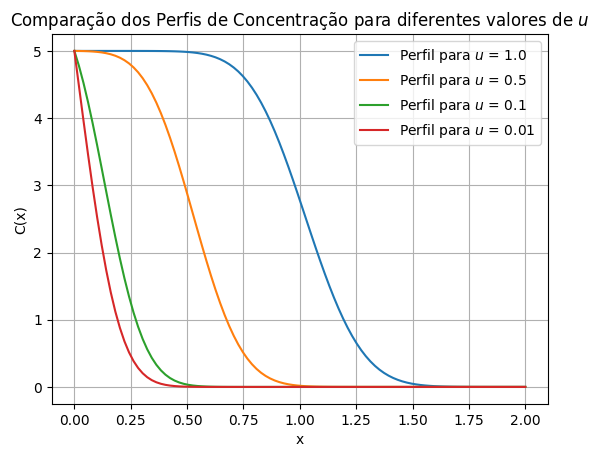

In [155]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 1.0   # tempo total de simulação
alpha = 0.01
CE = 5.0

# Parâmetros de discretização
Nx = 100  # número de pontos no espaço
Nt = 1000  # número de pontos no tempo

# Resultado
u = 1.0
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil para $u$ = {u}')

u = 0.5  # velocidade u
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil para $u$ = {u}')

u = 0.1  # velocidade u
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil para $u$ = {u}')

u = 0.01  # velocidade u
C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
plt.plot(x, C[-1, :], label=f'Perfil para $u$ = {u}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de $u$'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')

Como observado, valores maiores de $u$ resultam em um transporte mais rápido da concentração, enquanto valores menores de $u$ resultam em um transporte mais lento e perfis de concentração mais suaves.

-------------------

## Concentração na fronteira esquerda do domínio

A condição de contorno no início do domínio (CE) tem um impacto significativo na solução da equação de advecção-difusão. Abaixo estão alguns pontos importantes sobre como diferentes valores de CE afetam a solução:

- **Maior CE**:
    - A concentração inicial no início do domínio é maior.
    - A concentração ao longo do domínio tende a ser maior, resultando em perfis de concentração mais elevados.
    - Pode resultar em uma maior quantidade de concentração sendo transportada ao longo do domínio.

- **Menor CE**:
    - A concentração inicial no início do domínio é menor.
    - A concentração ao longo do domínio tende a ser menor, resultando em perfis de concentração mais baixos.
    - Pode resultar em uma menor quantidade de concentração sendo transportada ao longo do domínio.

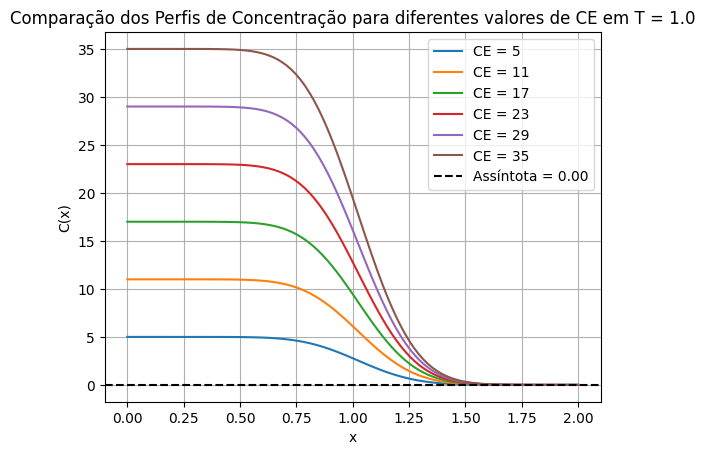

In [156]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 1.0   # tempo total de simulação
alpha = 0.01
u = 1.0

# Parâmetros de discretização
Nx = 100  # número de pontos no espaço
Nt = 1000  # número de pontos no tempo

# Condições de contorno
CE_values = np.arange(5, 36, 6)  # valor de C em x = 0

valores_finais = []

for CE in CE_values:
    C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
    plt.plot(x, C[-1, :], label=f'CE = {CE}')
    valores_finais.append(C[-1, -1])

# Calculando a média dos valores finais
media_valores_finais = np.mean(valores_finais)

# Plotando a assíntota
plt.axhline(y=media_valores_finais, color='black', linestyle='--', label=f'Assíntota = {media_valores_finais:.2f}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de CE em T = 1.0'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')

Os gráficos gerados mostram como diferentes valores de CE afetam os perfis de concentração ao longo do domínio. A média dos valores finais de concentração também é calculada e plotada como uma assíntota para referência, tendendo a 0. Porém, ao simular um intervalo maior de tempo, o comportamento será diferente.

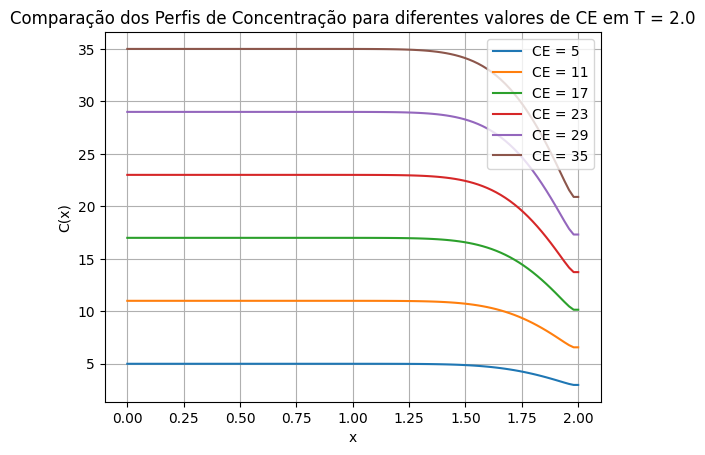

In [157]:
# Parâmetros do problema
Lx = 2.0  # comprimento do domínio
T = 2.0   # tempo total de simulação
alpha = 0.01
u = 1.0

# Parâmetros de discretização
Nx = 100  # número de pontos no espaço
Nt = 1000  # número de pontos no tempo

# Condições de contorno
CE_values = np.arange(5, 36, 6)  # valor de C em x = 0


for CE in CE_values:
    C, x = func_C(Lx, Nx, T, Nt, alpha, u, CE)
    plt.plot(x, C[-1, :], label=f'CE = {CE}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de CE em T = 2.0'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab4/'+titulo+'.png')

Após um segundo, a concentração já se aproxima da fronteira CE devido à combinação dos efeitos de advecção e difusão no sistema. A advecção transporta a concentração ao longo do domínio, enquanto a difusão espalha a concentração. A condição de contorno CE impõe um valor fixo de concentração na fronteira esquerda do domínio, e com o tempo, a concentração no domínio tende a se ajustar para refletir essa condição de contorno.